<a href="https://colab.research.google.com/github/Liamsi1597/PFE/blob/master/Application_du_package_Ethik_sur_le_jeu_de_donn%C3%A9es_de_Ribeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application du package Ethik sur le jeu de données de Ribeiro

## 1 - Ethik : C'est quoi ?

Ethik est un package Python qui a pour but d'expliquer les règles de décision entraînées et pour s'assurer qu'elles sont équitables. 

L'idée principale est de mettre l'accent ou faire varier une ou plusieurs variables d'un ensemble de test et d'observer par la suite comment le modèle d'apprentissage automatique entraîné réagit face à cette variation.

La contrainte est basée sur un schéma de repondération statistique appelé projection de variable entropique. L'avantage principal de cette méthode c'est qu'elle ne va prendre en compte que des scénarios réalistes et qu'elle ne va pas construire de faux exemples. 

Ethik reste également applicable aux jeux de données assez grand et peut être utilisé pour :
![alt text](ethic.png "Base de données")

Grâce à Ethik on peut :
 
* Tracer la sortie moyenne d’un modèle par rapport à la valeur moyenne d’une caractéristique.
* Tracer simultanément l’influence de plusieurs caractéristiques sur le modèle (la sortie moyenne du modèle par rapport à la valeur moyenne de chaque caractéristiques).
* Classer les features en fonction de leur influence/importance sur le modèle.
* Comparer deux individus par rapport aux features. 
* Visualiser la performance du modèle par rapport à la valeur moyenne du feature.
* Visualiser l’influence du pixel sur la sortie pour les images. 


## 2 - Ethik : Comment ça marche ?

Ethik nous permet d'explorer l'impact de chaque features sur le comportement du modèle, que ce soit sa prédiction ou ses performances.

Afin de bien comprendre comment on peut utiliser le package et comment cela marche, on peut voir la partie "How it works" sur le site internet suivant : https://xai-aniti.github.io/ethik/tutorials/how-it-works 

## 3 - Ethik : Exemples 

On peut trouver plusieurs exemples dans la rubrique "Tutorials" du site internet : https://xai-aniti.github.io/ethik/tutorials/

## 4 - Application d'Ethik sur un nouveau dataset :

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive/My Drive/PFE/automatic-ecg-diagnosis-master

/content/drive/My Drive/PFE/automatic-ecg-diagnosis-master


In [ ]:
#Importer les bibliothèques :
import numpy as np
import pandas 
import keras 
import tensorflow 
import h5py 
import scipy
import sklearn 
import tqdm 
import xarray 
import seaborn 
import matplotlib.pyplot as plt

(827, 4096, 12)


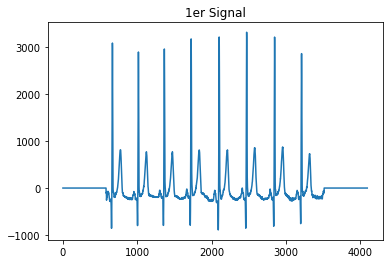

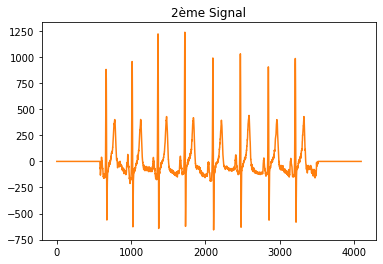

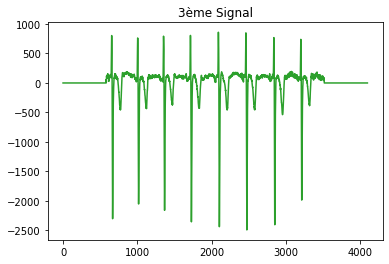

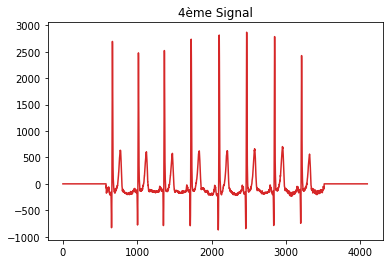

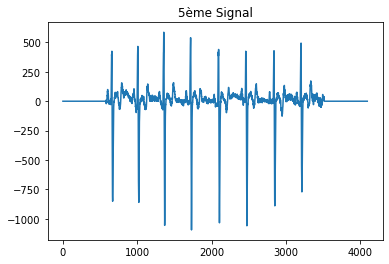

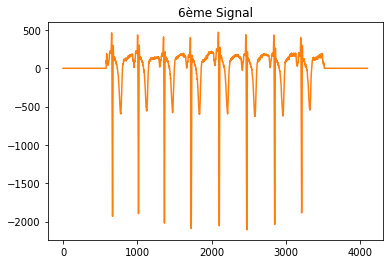

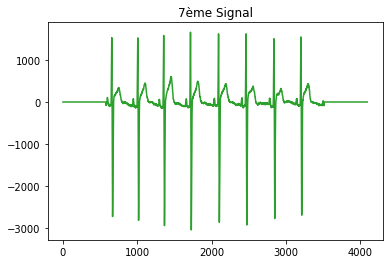

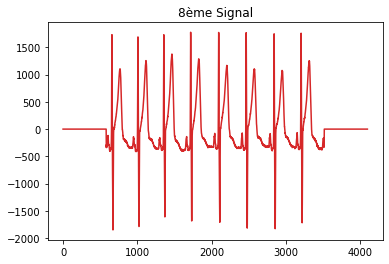

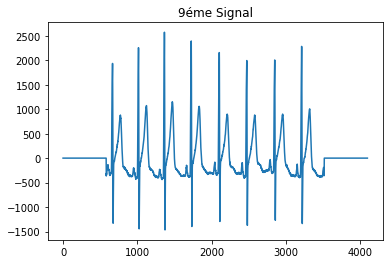

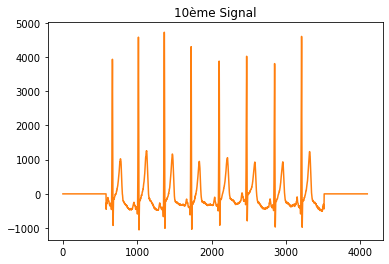

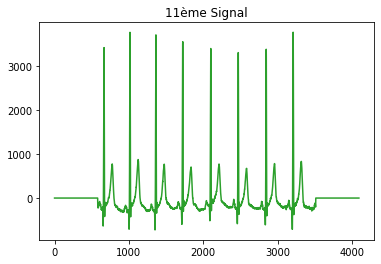

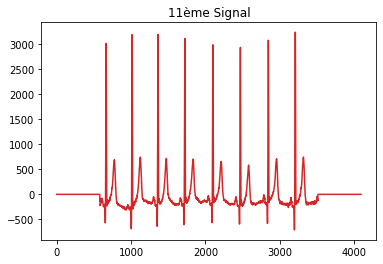

In [ ]:
#Importer les données
f = h5py.File('./data/ecg_tracings.hdf5', "r")
data = list(f['tracings'])
#print(data)
print(np.shape(data))
ECG=[]
for j in range (12):
    L=[]
    for i in range (np.shape(data)[1]):
        L.append(data[0][i][j]*1000)  #On a multiplié par 1000 afin d'obtenir un signal en V
    ECG.append(L)
#traces des signaux :
plt.plot(ECG[0])
plt.title('1er Signal')
plt.show()
plt.plot(ECG[1], 'tab:orange')
plt.title('2ème Signal')
plt.show()
plt.plot(ECG[2], 'tab:green')
plt.title('3ème Signal')
plt.show()
plt.plot(ECG[3], 'tab:red')
plt.title('4ème Signal')
plt.show()
plt.plot(ECG[4])
plt.title('5ème Signal')
plt.show()
plt.plot(ECG[5], 'tab:orange')
plt.title('6ème Signal')
plt.show()
plt.plot(ECG[6], 'tab:green')
plt.title('7ème Signal')
plt.show()
plt.plot(ECG[7], 'tab:red')
plt.title('8ème Signal')
plt.show()
plt.plot(ECG[8])
plt.title('9éme Signal')
plt.show()
plt.plot(ECG[9], 'tab:orange')
plt.title('10ème Signal')
plt.show()
plt.plot(ECG[10], 'tab:green')
plt.title('11ème Signal')
plt.show()
plt.plot(ECG[11], 'tab:red')
plt.title('11ème Signal')
plt.show()

#ils ont rajoutés 648 zéros au début et à la fin histoire d'avoir la même taille

In [ ]:
#convertir le type de données de list en array :
print(type(data))
X = np.asarray(data)
print(type(X))
print(X)
print(X.shape)

<class 'list'>
<class 'numpy.ndarray'>
[[[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [-0.43425145  0.00380549  0.43805694 ...  1.20552059  1.66197859
   -0.76743238]
  [-0.40663559  0.01588737  0.42252296 ...  1.20201614  1.65950262
   -0.76712383]
  [-0.38198727  0.02548188  0.40746919 ...  1.20299696  1.65952942
   -0.75982732]]

 [[ 0.          0.   

In [ ]:
#On commence par split notre dataset en X_train et X_test
#print(data)
from sklearn import model_selection
import pandas as pd

b = np.array([i for i in range(X.shape[0])])
#print(b)
y= pd.read_csv('./data/annotations/cardiologist1.csv').values #on importe les prédictions des cardiologists
print(type(y))


X_train, X_test, y_train, y_test,indices_train,indices_test = model_selection.train_test_split(X, y,b,test_size=0.2, shuffle=True, random_state=42)
print(y_train)
#print(np.shape(X_test))
#print(indices_test)

<class 'numpy.ndarray'>
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]]


In [ ]:
#Importer les données d'age et de genre de chaque patient :
y1= pd.read_csv('./data/attributes.csv').values
print(type(y1))
y1 = np.asarray(y1)
y1 = pd.DataFrame(y1)
y1.columns = ['Age', 'Gender']
print(y1)
#print(type(y1))
#y2=[]
#for i in indices_test :
#  y2.append(y1[i])
#y2 = np.asarray(y2)
#y2 = pd.DataFrame(y2)
#y2.columns = ['Age', 'Gender']
#print(y2)

<class 'numpy.ndarray'>
    Age Gender
0    34      M
1    70      F
2    52      F
3    41      F
4    32      F
..   ..    ...
822  77      F
823  33      F
824  46      F
825  41      F
826  21      M

[827 rows x 2 columns]


In [ ]:
#Model :
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.layers import (Input, Conv1D, MaxPooling1D, Dropout,
                          BatchNormalization, Activation, Add,
                          Flatten, Dense)
from keras.models import Model
import numpy as np


class ResidualUnit(object):
    """Residual unit block (unidimensional).
    Parameters
    ----------
    n_samples_out: int
        Number of output samples.
    n_filters_out: int
        Number of output filters.
    kernel_initializer: str, otional
        Initializer for the weights matrices. See Keras initializers. By default it uses
        'he_normal'.
    dropout_rate: float [0, 1), optional
        Dropout rate used in all Dropout layers. Default is 0.8
    kernel_size: int, optional
        Kernel size for convolutional layers. Default is 17.
    preactivation: bool, optional
        When preactivation is true use full preactivation architecture proposed
        in [1]. Otherwise, use architecture proposed in the original ResNet
        paper [2]. By default it is true.
    postactivation_bn: bool, optional
        Defines if you use batch normalization before or after the activation layer (there
        seems to be some advantages in some cases:
        https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md).
        If true, the batch normalization is used before the activation
        function, otherwise the activation comes first, as it is usually done.
        By default it is false.
    activation_function: string, optional
        Keras activation function to be used. By default 'relu'.
    References
    ----------
    .. [1] K. He, X. Zhang, S. Ren, and J. Sun, "Identity Mappings in Deep Residual Networks,"
           arXiv:1603.05027 [cs], Mar. 2016. https://arxiv.org/pdf/1603.05027.pdf.
    .. [2] K. He, X. Zhang, S. Ren, and J. Sun, "Deep Residual Learning for Image Recognition," in 2016 IEEE Conference
           on Computer Vision and Pattern Recognition (CVPR), 2016, pp. 770-778. https://arxiv.org/pdf/1512.03385.pdf
    """

    def __init__(self, n_samples_out, n_filters_out, kernel_initializer='he_normal',
                 dropout_rate=0.8, kernel_size=17, preactivation=True,
                 postactivation_bn=False, activation_function='relu'):
        self.n_samples_out = n_samples_out
        self.n_filters_out = n_filters_out
        self.kernel_initializer = kernel_initializer
        self.dropout_rate = dropout_rate
        self.kernel_size = kernel_size
        self.preactivation = preactivation
        self.postactivation_bn = postactivation_bn
        self.activation_function = activation_function

    def _skip_connection(self, y, downsample, n_filters_in):
        """Implement skip connection."""
        # Deal with downsampling
        if downsample > 1:
            y = MaxPooling1D(downsample, strides=downsample, padding='same')(y)
        elif downsample == 1:
            y = y
        else:
            raise ValueError("Number of samples should always decrease.")
        # Deal with n_filters dimension increase
        if n_filters_in != self.n_filters_out:
            # This is one of the two alternatives presented in ResNet paper
            # Other option is to just fill the matrix with zeros.
            y = Conv1D(self.n_filters_out, 1, padding='same',
                       use_bias=False, kernel_initializer=self.kernel_initializer)(y)
        return y

    def _batch_norm_plus_activation(self, x):
        if self.postactivation_bn:
            x = Activation(self.activation_function)(x)
            x = BatchNormalization(center=False, scale=False)(x)
        else:
            x = BatchNormalization()(x)
            x = Activation(self.activation_function)(x)
        return x

    def __call__(self, inputs):
        """Residual unit."""
        x, y = inputs
        n_samples_in = y.shape[1].value
        downsample = n_samples_in // self.n_samples_out
        n_filters_in = y.shape[2].value
        y = self._skip_connection(y, downsample, n_filters_in)
        # 1st layer
        x = Conv1D(self.n_filters_out, self.kernel_size, padding='same',
                   use_bias=False, kernel_initializer=self.kernel_initializer)(x)
        x = self._batch_norm_plus_activation(x)
        if self.dropout_rate > 0:
            x = Dropout(self.dropout_rate)(x)

        # 2nd layer
        x = Conv1D(self.n_filters_out, self.kernel_size, strides=downsample,
                   padding='same', use_bias=False,
                   kernel_initializer=self.kernel_initializer)(x)
        if self.preactivation:
            x = Add()([x, y])  # Sum skip connection and main connection
            y = x
            x = self._batch_norm_plus_activation(x)
            if self.dropout_rate > 0:
                x = Dropout(self.dropout_rate)(x)
        else:
            x = BatchNormalization()(x)
            x = Add()([x, y])  # Sum skip connection and main connection
            x = Activation(self.activation_function)(x)
            if self.dropout_rate > 0:
                x = Dropout(self.dropout_rate)(x)
            y = x
        return [x, y]


# ----- Model ----- #
kernel_size = 16
kernel_initializer = 'he_normal'
signal = Input(shape=(4096, 12), dtype=np.float32, name='signal')
age_range = Input(shape=(6,), dtype=np.float32, name='age_range')
is_male = Input(shape=(1,), dtype=np.float32, name='is_male')
x = signal
x = Conv1D(64, kernel_size, padding='same', use_bias=False,
           kernel_initializer=kernel_initializer)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x, y = ResidualUnit(1024, 128, kernel_size=kernel_size,kernel_initializer=kernel_initializer)([x, x])
x, y = ResidualUnit(256, 196, kernel_size=kernel_size,kernel_initializer=kernel_initializer)([x, y])
x, y = ResidualUnit(64, 256, kernel_size=kernel_size,kernel_initializer=kernel_initializer)([x, y])
x, _ = ResidualUnit(16, 320, kernel_size=kernel_size,kernel_initializer=kernel_initializer)([x, y])
x = Flatten()(x)
diagn = Dense(6, activation='sigmoid', kernel_initializer=kernel_initializer)(x)
model = Model(signal, diagn)
# ----------------- #


#if __name__ == "__main__":
    #model.summary()

In [ ]:
def train(model):
    model.fit(X_train, y_train,
              batch_size=64,
              epochs=2,    #j'ai mis 20 juste pour tester, avec 70 epoch ca met beaucoup de temps à tourner
              initial_epoch=0,
              verbose=1,
              validation_split=0.02,
              shuffle='batch', 
              validation_data=(X_test, y_test))
    
    return model.evaluate(X_test, y_test, verbose=0)
    
def predict(model):
    return model.predict(X_test,batch_size=32, verbose=1)

In [ ]:
import tensorflow.compat.v1 as tf  #Fait appel à la binliothèque Tensorflow Version 1.xx
tf.disable_v2_behavior()
from keras.optimizers import Adam 
loss='binary_crossentropy'
lr = 0.001
opt=Adam(lr)
model.compile(loss=loss, optimizer=opt)
loss = train(model)
y_pred = predict(model)

Train on 661 samples, validate on 166 samples
Epoch 1/2
661/661 [==============================] - ETA: 0s - loss: 0.3124WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
661/661 [==============================] - 165s 250ms/sample - loss: 0.3124 - val_loss: 0.4456
Epoch 2/2
661/661 [==============================] - 162s 245ms/sample - loss: 0.1882 - val_loss: 0.4329


In [ ]:
#calculer la taill de notre y_pred :
print(y_pred.shape)
y_pred= pd.DataFrame(y_pred)  
y_pred.columns = ['1dAVb', 'RBBB','LBBB','SB','AF','ST']
print(y_pred.max()) #permet de nous renvoyer le max de chaque colonne du tableau 

(166, 6)
1dAVb    0.000751
RBBB     0.000583
LBBB     0.017477
SB       0.000143
AF       0.000024
ST       0.000734
dtype: float32


On remarque que la valeur maximale de chaque anomalie est très faible et de l'ordre de $10^{-3}$, ce qui veut dire que la probabilité que le patient soit malade est quasiment nul, alors que c'est pas logique car on connaît dèjà les résultats qu'on est censé obtenir.
Cela est dû au fait qu'on prend pas un nombre suffisant d'epoch. J'ai testé pour un nombre d'epoch égal à 20, et j'ai remarqué que la valeur maximale a augmenté et devenue de l'ordre de $10^{-2}$, mais cela restait pas concluant. C'est pour cela le nombre d'epoch était fixé à 70 afin d'obtenir de meilleurs résultats et une meilleure convergence.

In [ ]:
#afin d'éviter d'attendre que chaque epoch tourne, on avait sauvegarder le modèle et les résultats obtenues dans le premier notebook
y_pred_model=np.load('./dnn_predicts/model.npy')
print(y_pred_model.shape)
y_pred_model= pd.DataFrame(y_pred_model)
y_pred_model.columns = ['1dAVb', 'RBBB','LBBB','SB','AF','ST']
print(y_pred_model.max())
k=y_pred_model.to_numpy() 
for i in range (k.shape[0]):
    for j in range (k.shape[1]):
        if k[i,j]>=0.51 :
            k[i,j]=1
        else :
            k[i,j]=0
print(type(k))
#res = np.equal(y,k)
#print()
#print(np.sum(res[:,0]))
#print(np.sum(res[:,1]))

(827, 6)
1dAVb    0.648175
RBBB     0.859752
LBBB     0.907257
SB       0.714574
AF       0.940087
ST       0.822831
dtype: float32
<class 'numpy.ndarray'>


On remarque alors qu'avec une epoch égale à 7O, On a de bonnes probabilités (entre 0 et 0,5 le patient ne présente aucun risque et n'est pas malade, au delà de 0,5 la probabilté que le patient est malade devient importante et donc on suit l'état du patient de près) et de l'ordre de $10^{-1}$. 

In [ ]:
#Installation de la bibliothèque Ethik 

In [ ]:
pip install ethik 

In [ ]:
import ethik
explainer = ethik.ClassificationExplainer()

In [ ]:
explainer.plot_influence(
    X_test=y1['Gender'],
    y_pred=y_pred_model
)

100%|██████████| 82/82 [00:00<00:00, 264.81it/s]


En prenant toutes les sorties, la lecture du diagramme devient moins lisible et non concluante, c'est pour cela on se concentre sur une seule et on regarde de près de ce qui se passe :

In [ ]:
#sur 1dAvb
explainer.plot_influence(
    X_test=y1['Gender'],
    y_pred=y_pred_model['1dAVb']
).show()

100%|██████████| 82/82 [00:00<00:00, 275.78it/s]


In [ ]:
#sur AF
explainer.plot_influence(
    X_test=y1['Gender'],
    y_pred=y_pred_model['AF']
).show()

100%|██████████| 82/82 [00:00<00:00, 277.25it/s]


In [ ]:
#sur RBBB
explainer.plot_influence(
    X_test=y1['Gender'],
    y_pred=y_pred_model['RBBB']
).show()

100%|██████████| 82/82 [00:00<00:00, 248.76it/s]


In [ ]:
explainer.plot_influence_ranking(
    X_test=y1['Gender'],
    y_pred=y_pred_model,
)

100%|██████████| 492/492 [00:01<00:00, 270.79it/s]


Passons maintenant à l'attribut d'âge :

In [ ]:
explainer.plot_influence(
    X_test=y1['Age'],
    y_pred=y_pred_model
)

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 17 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 18 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 19 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 20 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 21 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 22 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 23 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 24

In [41]:
explainer.plot_influence_ranking(
    X_test=y1['Age'],
    y_pred=y_pred_model,
)

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 17 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 18 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 19 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 20 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 21 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 22 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 23 are identical

/usr/local/lib/python3.6/dist-packages/ethik/query.py:144: ConstantWarning:

all the values of feature Age = 24

Passage aux ondlettes et à la transformée de fourier :

<class 'numpy.ndarray'>


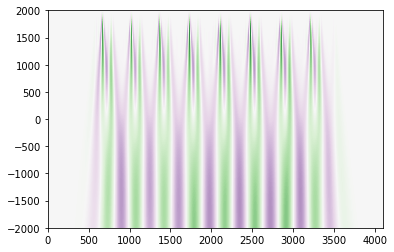

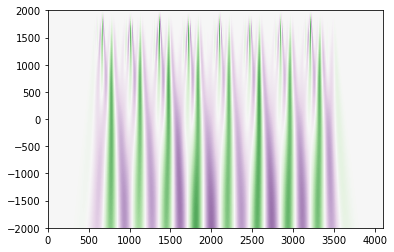

In [42]:
from scipy import signal
import matplotlib.pyplot as plt
sig=np.asarray(ECG[3])
sig1=np.asarray(ECG[1])
print (type(sig))
#sig  = ECG[3]
widths = np.arange(1, 100)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.imshow(cwtmatr, extent=[0, 4096, -2000, 2000], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()
cwtmatr1 = signal.cwt(sig1, signal.ricker, widths)
plt.imshow(cwtmatr1, extent=[0, 4096, -2000, 2000], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr1).max(), vmin=-abs(cwtmatr1).max())
plt.show()

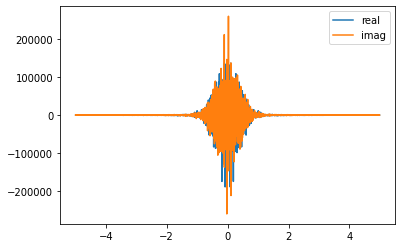

In [43]:
# calcul de la transformee de Fourier et des frequences
dt = 0.1
fourier = np.fft.fft(sig)
n = sig.size
freq = np.fft.fftfreq(n, d=dt)

# affichage de la transformee de Fourier
plt.plot(freq, fourier.real, label="real")
plt.plot(freq, fourier.imag, label="imag")
plt.legend()

plt.show()

## 5 - Discussion :